# My approach

1. The first and foremost step is to understand the problem statement entirely and make important deductions based on the statement .


  + What are we trying to find out ? Engagement of different types of customers and effectivity of Starbucks offer Campaign.
  + What are the important factors affecting the following ?
  + In what areas to focus in order to achieve max output . 
  
  
2. Importing the required libraries .


3. Loading the data .


 + The data consists of 3 parts . We call each part seperatly and assign 3 seperate dataframes to each .
 + For further analysis of these data and how they correlate with each other , we can merge them and then analyse them further however , I usually extend this part to EDA and not in Loading the Data because the data we have just received might not be perfect . It is not right to make dedcutions without clearing your assumptions on the data and without cleaning it .


4. Data Wrangling / Cleaning


  + This is always an important step . This step becomes ground for clearing any assumptions about the data through hypothesis testing .
  + Further , cleaning and transforming the data further prerares it for EDA . 
 
   >  Do keep in mind that data transormation here doesn't refer to minmax scaling or normalization . Simply conversion of irregular attributes to derive more regular attributes ( for example : dict value from offer Data ) .

 # Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# plt.style.use('fivethirtyeight')
# sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.decomposition import PCA

# Loading Data

In [2]:
customerData = pd.read_csv('profile.csv')
offerData = pd.read_csv('portfolio.csv')
offerTData = pd.read_csv('transcript.csv')

# Data Wrangling and Transformation

### Customer Data

In [3]:
customerData.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [5]:
customerData = customerData.drop('Unnamed: 0', axis=1)

In [6]:
customerData.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [7]:
setofids = set()
tempd = customerData.copy()
tempd['income'] = tempd['income'].isna()
tempd['remove'] = np.where((tempd.income==True) , 1, 0)
print(tempd['remove'].sum())
for i,c in tempd.iterrows():
    if c['remove'] == 1:
        setofids.add(c['id'])
print(len(setofids))

2175
2175


In [8]:
offerTData = offerTData[~offerTData.person.isin(setofids)]

In [9]:
customerData = customerData[~customerData.id.isin(setofids)]

In [10]:
cus_ids = list(customerData['id'])
cus_ids.sort()
off_ids = list(offerTData['person'].unique())
off_ids.sort()
print(cus_ids==off_ids)

True


### Offer data

In [11]:
offerData = offerData.drop('Unnamed: 0', axis=1)
offerData.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [12]:
offerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [13]:
offerData = offerData.groupby(['offer_type','difficulty','duration','reward','channels','id']).count().sort_values(by=['offer_type','difficulty'])

In [14]:
# For simpler depiciton , id add an  index column for each offer 
offerData.reset_index(inplace=True,drop=False)

In [15]:
offerData

,offer_type,difficulty,duration,reward,channels,id
0,bogo,5,5,5,"['web', 'email', 'mobile', 'social']",f19421c1d4aa40978ebb69ca19b0e20d
1,bogo,5,7,5,"['web', 'email', 'mobile']",9b98b8c7a33c4b65b9aebfe6a799e6d9
2,bogo,10,5,10,"['web', 'email', 'mobile', 'social']",4d5c57ea9a6940dd891ad53e9dbe8da0
3,bogo,10,7,10,"['email', 'mobile', 'social']",ae264e3637204a6fb9bb56bc8210ddfd
4,discount,7,7,3,"['web', 'email', 'mobile', 'social']",2298d6c36e964ae4a3e7e9706d1fb8c2
5,discount,10,7,2,"['web', 'email', 'mobile']",2906b810c7d4411798c6938adc9daaa5
6,discount,10,10,2,"['web', 'email', 'mobile', 'social']",fafdcd668e3743c1bb461111dcafc2a4
7,discount,20,10,5,"['web', 'email']",0b1e1539f2cc45b7b9fa7c272da2e1d7
8,informational,0,3,0,"['email', 'mobile', 'social']",5a8bc65990b245e5a138643cd4eb9837
9,informational,0,4,0,"['web', 'email', 'mobile']",3f207df678b143eea3cee63160fa8bed


### Transcript Data

In [16]:
offerTData = offerTData.drop('Unnamed: 0', axis=1)
offerTData.reset_index(inplace=True,drop=True)
offerTData.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
2,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [17]:
offerTData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  272762 non-null  object
 1   event   272762 non-null  object
 2   value   272762 non-null  object
 3   time    272762 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.3+ MB


In [18]:
def hypothTesting(coln):
    of_v = offerTData[offerTData['event']==coln]
    tranDict = of_v['value']
    tranDict = tranDict.apply(eval)
    set1 = set()
    set2 = set()
    for _ in tranDict:
        set1.add(len(_))
        set2.add(next(iter(_)))
    print("First example : "+str(next(iter(tranDict)))) # add format from customer segmentation
    print("No. of elements in dict. : "+str(set1))
    print("First element of dict. : "+str(set2))

In [19]:
offerTData['event'].value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

In [20]:
hypothTesting('transaction')

First example : {'amount': 0.8300000000000001}
No. of elements in dict. : {1}
First element of dict. : {'amount'}


In [21]:
hypothTesting('offer received')

First example : {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
No. of elements in dict. : {1}
First element of dict. : {'offer id'}


In [22]:
hypothTesting('offer viewed')

First example : {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
No. of elements in dict. : {1}
First element of dict. : {'offer id'}


In [23]:
hypothTesting('offer completed')

First example : {'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}
No. of elements in dict. : {2}
First element of dict. : {'offer_id'}


In [24]:
# Adding reward,offer_id,amount column to the offer dataset

tranDict = offerTData['value']
tranDict = tranDict.apply(eval)

offerTData['reward'] = 0
offerTData['offer id'] = 0
offerTData['amount'] = 0
offerTData.reset_index(inplace=True,drop=True)

for i,c in offerTData.iterrows():
    if c['event'] == 'transaction':
        offerTData.loc[i,'amount'] = tranDict[i]['amount']
    elif c['event'] == 'offer completed':
        offerTData.loc[i,'offer id'] = tranDict[i]['offer_id']
        offerTData.loc[i,'reward'] = tranDict[i]['reward']
    else:
        offerTData.loc[i,'offer id'] = tranDict[i]['offer id']

In [25]:
offerTData.drop('value',axis=1,inplace=True)
offerTData.head()

,person,event,time,reward,offer id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,e2127556f4f64592b11af22de27a7932,offer received,0,0,2906b810c7d4411798c6938adc9daaa5,0.0
2,389bc3fa690240e798340f5a15918d5c,offer received,0,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,0,3f207df678b143eea3cee63160fa8bed,0.0
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0


In [26]:
offerTData = offerTData.sort_values(by=['person'])
customerData = customerData.sort_values(by=['id'])

# Data Engineering

## Transcript dataset

In [27]:
offerTData = offerTData.assign(daysSinceStart = offerTData['time']/24).astype({'daysSinceStart': 'int64'})
offerTData = offerTData.assign(dayQuarter = offerTData['time']%24).astype({'dayQuarter': 'int64'})
offerTData = offerTData.assign(dayQuarter = offerTData['dayQuarter']/6).astype({'dayQuarter': 'str'})

In [28]:
#offerTData = pd.get_dummies(offerTData, columns = ['dayQuarter'])

In [29]:
offerTData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 229997 to 28956
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   person          272762 non-null  object 
 1   event           272762 non-null  object 
 2   time            272762 non-null  int64  
 3   reward          272762 non-null  int64  
 4   offer id        272762 non-null  object 
 5   amount          272762 non-null  float64
 6   daysSinceStart  272762 non-null  int64  
 7   dayQuarter      272762 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 18.7+ MB


In [30]:
offerTData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 229997 to 28956
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   person          272762 non-null  object 
 1   event           272762 non-null  object 
 2   time            272762 non-null  int64  
 3   reward          272762 non-null  int64  
 4   offer id        272762 non-null  object 
 5   amount          272762 non-null  float64
 6   daysSinceStart  272762 non-null  int64  
 7   dayQuarter      272762 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 18.7+ MB


In [31]:
offerTData['dayQuarter'].value_counts()

0.0    124216
1.0     52125
2.0     49342
3.0     47079
Name: dayQuarter, dtype: int64

## Customer dataset

#### Order of viewing

In [32]:
tempd = offerTData.copy()[['person','time','offer id']][offerTData['event']=='offer viewed'].sort_values(by=['person','time'])
tempd.reset_index(inplace=True,drop=False)

In [33]:
customerData['orderOfView'] = None

for i,c in tempd.iterrows():
    t = customerData.index[customerData['id'] == c['person']].tolist()
    t1 = t[0]
    if(customerData.loc[t1,'orderOfView'] == None):
        customerData.loc[t1,'orderOfView'] = c['offer id']
    else:
        customerData.loc[t1,'orderOfView'] = customerData.loc[t1,'orderOfView'] + c['offer id']

In [34]:
customerData.isna().sum()  # no. of users who didnt view any offer

gender                0
age                   0
id                    0
became_member_on      0
income                0
orderOfView         150
dtype: int64

In [35]:
customerData.fillna(0)

,gender,age,id,became_member_on,income,orderOfView
3793,M,33,0009655768c64bdeb2e877511632db8f,20170421,72000.0,5a8bc65990b245e5a138643cd4eb98373f207df678b143...
4201,O,40,0011e0d4e6b944f998e987f904e8c1e5,20180109,57000.0,3f207df678b143eea3cee63160fa8bed2298d6c36e964a...
2563,F,59,0020c2b971eb4e9188eac86d93036a77,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a44d5c57ea9a6940...
8413,F,24,0020ccbbb6d84e358d3414a3ff76cffd,20161111,60000.0,2298d6c36e964ae4a3e7e9706d1fb8c2f19421c1d4aa40...
10128,F,26,003d66b6608740288d6cc97a6903f4f0,20170621,73000.0,5a8bc65990b245e5a138643cd4eb9837fafdcd668e3743...
...,...,...,...,...,...,...
5243,F,69,fff3ba4757bd42088c044ca26d73817a,20150920,83000.0,fafdcd668e3743c1bb461111dcafc2a49b98b8c7a33c4b...
6342,M,71,fff7576017104bcc8677a8d63322b5e1,20171031,73000.0,fafdcd668e3743c1bb461111dcafc2a44d5c57ea9a6940...
1603,M,71,fff8957ea8b240a6b5e634b6ee8eafcf,20180218,56000.0,fafdcd668e3743c1bb461111dcafc2a44d5c57ea9a6940...
254,M,34,fffad4f4828548d1b5583907f2e9906b,20170123,34000.0,f19421c1d4aa40978ebb69ca19b0e20d5a8bc65990b245...


#### Most Completed Offer Categorised

In [36]:
# most completed offer

customerData = customerData.sort_values(by=['id'])
customerData.reset_index(inplace=True,drop=True)

customerData['of0c'] = 0
customerData['of1c'] = 0
customerData['of2c'] = 0
customerData['of3c'] = 0
customerData['of4c'] = 0
customerData['of5c'] = 0
customerData['of6c'] = 0
customerData['of7c'] = 0
customerData['of8c'] = 0
customerData['of9c'] = 0

tempd = offerTData.copy()[offerTData['event']=='offer completed']
tempd = tempd.sort_values(by=['person','offer id'])
tempd.reset_index(inplace=True,drop=False)

for i,c in tempd.iterrows():
    t = customerData.index[customerData['id'] == c['person']].tolist()
    t1 = t[0]
    if(c['offer id']=='0b1e1539f2cc45b7b9fa7c272da2e1d7'):
        customerData.loc[t1,'of0c'] = customerData.loc[t1,'of0c'] + 1
    elif(c['offer id']=='2298d6c36e964ae4a3e7e9706d1fb8c2'):
        customerData.loc[t1,'of1c'] = customerData.loc[t1,'of1c'] + 1
    elif(c['offer id']=='2906b810c7d4411798c6938adc9daaa5'):
        customerData.loc[t1,'of2c'] = customerData.loc[t1,'of2c'] + 1
    elif(c['offer id']=='3f207df678b143eea3cee63160fa8bed'):
        customerData.loc[t1,'of3c'] = customerData.loc[t1,'of3c'] + 1
    elif(c['offer id']=='4d5c57ea9a6940dd891ad53e9dbe8da0'):
        customerData.loc[t1,'of4c'] = customerData.loc[t1,'of4c'] + 1
    elif(c['offer id']=='5a8bc65990b245e5a138643cd4eb9837'):
        customerData.loc[t1,'of5c'] = customerData.loc[t1,'of5c'] + 1
    elif(c['offer id']=='9b98b8c7a33c4b65b9aebfe6a799e6d9'):
        customerData.loc[t1,'of6c'] = customerData.loc[t1,'of6c'] + 1
    elif(c['offer id']=='ae264e3637204a6fb9bb56bc8210ddfd'):
        customerData.loc[t1,'of7c'] = customerData.loc[t1,'of7c'] + 1
    elif(c['offer id']=='f19421c1d4aa40978ebb69ca19b0e20d'):
        customerData.loc[t1,'of8c'] = customerData.loc[t1,'of8c'] + 1
    elif(c['offer id']=='fafdcd668e3743c1bb461111dcafc2a4'):
        customerData.loc[t1,'of9c'] = customerData.loc[t1,'of9c'] + 1
    else:
        print('wtf')
        break   

#### Most Accessed Quarter

In [37]:
# most accessed quarter

customerData = customerData.sort_values(by=['id'])
customerData.reset_index(inplace=True,drop=True)

customerData['MAQ0'] = 0
customerData['MAQ1'] = 0
customerData['MAQ2'] = 0
customerData['MAQ3'] = 0

tempd = offerTData.copy()[offerTData['event']=='offer viewed']
tempd = tempd.sort_values(by=['person','offer id'])

tempd.reset_index(inplace=True,drop=False)
tempd.info()
for i,c in tempd.iterrows():
    t = customerData.index[customerData['id'] == c['person']].tolist()
    t1 = t[0]
    if(c['dayQuarter']=='0.0'):
        customerData.loc[t1,'MAQ0'] = customerData.loc[t1,'MAQ0'] + 1
    elif(c['dayQuarter']=='1.0'):
        customerData.loc[t1,'MAQ1'] = customerData.loc[t1,'MAQ1'] + 1
    elif(c['dayQuarter']=='2.0'):
        customerData.loc[t1,'MAQ2'] = customerData.loc[t1,'MAQ2'] + 1
    elif(c['dayQuarter']=='3.0'):
        customerData.loc[t1,'MAQ3'] = customerData.loc[t1,'MAQ3'] + 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49860 entries, 0 to 49859
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           49860 non-null  int64  
 1   person          49860 non-null  object 
 2   event           49860 non-null  object 
 3   time            49860 non-null  int64  
 4   reward          49860 non-null  int64  
 5   offer id        49860 non-null  object 
 6   amount          49860 non-null  float64
 7   daysSinceStart  49860 non-null  int64  
 8   dayQuarter      49860 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.4+ MB


In [38]:
customerData['MAQ'] = np.where((customerData.MAQ0 > customerData.MAQ1),np.where((customerData.MAQ0 > customerData.MAQ2),np.where((customerData.MAQ0 > customerData.MAQ3),"0","3") , np.where((customerData.MAQ2 > customerData.MAQ3),"2","3")),np.where((customerData.MAQ1 > customerData.MAQ2),np.where((customerData.MAQ1 > customerData.MAQ3),"1","3") , np.where((customerData.MAQ2 > customerData.MAQ3),"2","3")) )

In [39]:
customerData['MAQ'].value_counts()  

3    4002
0    4001
2    3465
1    3357
Name: MAQ, dtype: int64

In [40]:
customerData = customerData.drop(['MAQ0','MAQ1','MAQ2','MAQ3'],axis=1)

#### Memebership Date broken down

In [41]:
customerData['became_member_on'][0]

20170421

In [42]:
customerData["became_member_on"] = pd.to_datetime(customerData["became_member_on"],format="%Y%m%d")

In [43]:
# Member on
customerData = customerData.assign(year = customerData.became_member_on.dt.year,
                             month = customerData.became_member_on.dt.month,
                             day = customerData.became_member_on.dt.day,
                             month_name = customerData.became_member_on.dt.month_name(),
                             day_of_week = customerData.became_member_on.dt.weekday,
                             day_name = customerData.became_member_on.dt.day_name())

#### No. of offers received , viewed , completed and no. of transactions

In [44]:
tempd = offerTData.copy().groupby(['person','event']).count()
tempd.reset_index(inplace=True,drop=False)

In [45]:
# no. of rec,vie,com

customerData['offR'] = 0
customerData['offV'] = 0
customerData['offC'] = 0
customerData['transactions'] = 0

for i,c in tempd.iterrows():
    t = customerData.index[customerData['id'] == c['person']].tolist()
    t1 = t[0]
    if(c['event']=='offer completed'):
        customerData.loc[t1,'offC'] = c['time']
    elif(c['event']=='offer received'):
        customerData.loc[t1,'offR'] = c['time']
    elif(c['event']=='offer viewed'):
        customerData.loc[t1,'offV'] = c['time']
    elif(c['event']=='transaction'):
        customerData.loc[t1,'transactions'] = c['time']

#### Viewing Patterns correlates to interest

In [46]:
x = customerData[['of0c','of1c','of2c','of3c','of4c','of5c','of6c','of7c','of8c','of9c','orderOfView','offV','offC']]

In [47]:
x = pd.get_dummies(x, columns = ['orderOfView'])

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
#matrix = x.to_numpy()
#for n_clusters in range(3,8):
#    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
#    kmeans.fit(matrix)
#    clusters = kmeans.predict(matrix)
#    silhouette_avg = silhouette_score(matrix, clusters)
#    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [50]:
matrix = x.to_numpy()
n_clusters = 4
silhouette_avg = -1
while silhouette_avg < 0.167:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.1640442735081889
For n_clusters = 4 The average silhouette_score is : 0.1673284263088599


In [51]:
customerData['interest'] = pd.Series(clusters)

In [52]:
pd.Series(clusters).value_counts()

1    4674
3    3864
2    3525
0    2762
dtype: int64

####  Total money spent by each user

In [53]:
# Total money spent on each user
tempd = offerTData.copy()[['person','amount']].groupby('person').sum().sort_values(by=['person'])
tempd.reset_index(inplace=True,drop=False)

customerData['moneySpent'] = None

for i,c in tempd.iterrows():
    t = customerData.index[customerData['id'] == c['person']].tolist()
    t1 = t[0]
    customerData.loc[t1,'moneySpent'] = c['amount']

#### Final Dataset info

In [54]:
customerData = customerData[['id','gender','age','income','became_member_on','moneySpent','interest','MAQ','transactions','offV','offC','year','month','day','month_name','day_name','day_of_week']]

In [55]:
customerData.reset_index(drop=True,inplace=True)
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                14825 non-null  object        
 1   gender            14825 non-null  object        
 2   age               14825 non-null  int64         
 3   income            14825 non-null  float64       
 4   became_member_on  14825 non-null  datetime64[ns]
 5   moneySpent        14825 non-null  object        
 6   interest          14825 non-null  int32         
 7   MAQ               14825 non-null  object        
 8   transactions      14825 non-null  int64         
 9   offV              14825 non-null  int64         
 10  offC              14825 non-null  int64         
 11  year              14825 non-null  int64         
 12  month             14825 non-null  int64         
 13  day               14825 non-null  int64         
 14  month_name        1482

# EDA

## Customer Data

In [56]:
customerData.value_counts('gender')

gender
M    8484
F    6129
O     212
dtype: int64

### Gender

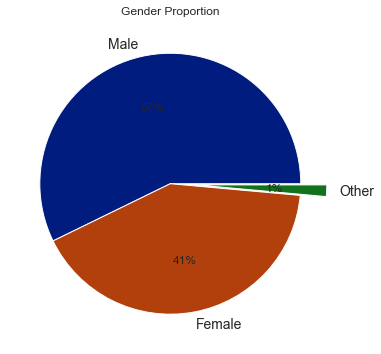

In [57]:
import seaborn

plt.figure(figsize=(15,6))
data =  customerData['gender'].value_counts()
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
plt.pie(data, labels=['Male', 'Female', 'Other'], colors=seaborn.color_palette('dark'),explode=[0,0,0.2], autopct='%.0f%%')
plt.title("Gender Proportion")
plt.show()

### Income

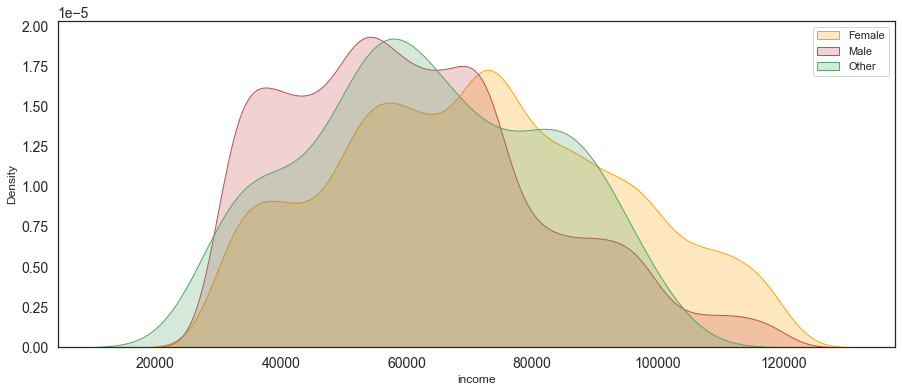

In [58]:
plt.figure(figsize=(15,6))

#sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.set_style('white')

sns.kdeplot(customerData[customerData['gender']=='F']['income'],shade=True,color = 'orange',label="Female")
sns.kdeplot(customerData[customerData['gender']=='M']['income'],shade=True,color = 'r',label="Male")
sns.kdeplot(customerData[customerData['gender']=='O']['income'],shade=True,color = 'g',label="Other")
plt.legend(labels=["Female","Male","Others"])
seaborn =  plt.legend().get_frame()
seaborn.set_facecolor ('white')
plt.show()

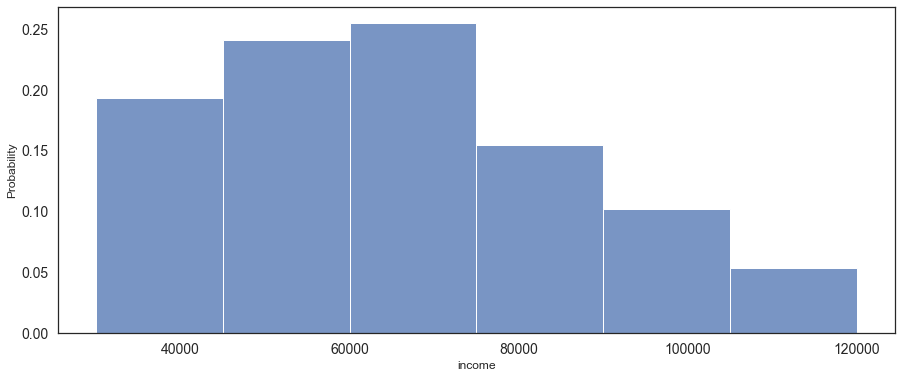

In [59]:
plt.figure(figsize=(15,6))
sns.histplot(customerData['income'], bins=[customerData['income'].min(), 45000, 60000, 75000, 90000, 105000, customerData['income'].max()] ,kde=False,stat = "probability")
plt.show()

### Age

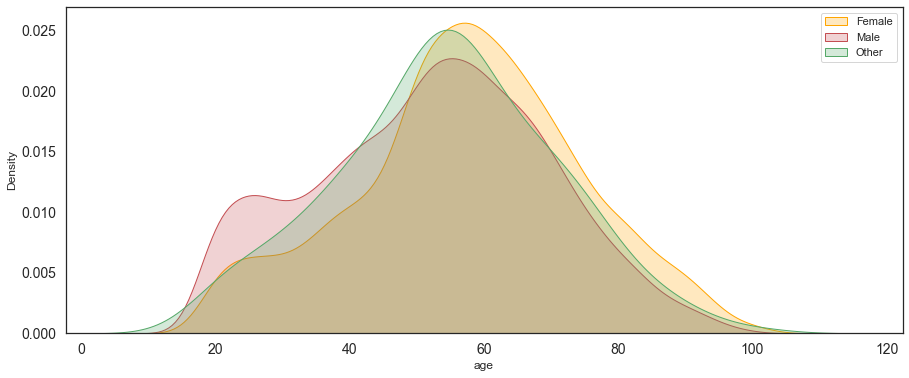

In [60]:
plt.figure(figsize=(15,6))
sns.kdeplot(customerData[customerData['gender']=='F']['age'],shade=True,color = 'orange',label="Female")
sns.kdeplot(customerData[customerData['gender']=='M']['age'],shade=True,color = 'r',label="Male")
sns.kdeplot(customerData[customerData['gender']=='O']['age'],shade=True,color = 'g',label="Other")
plt.legend(labels=["Female","Male","Others"])
seaborn =  plt.legend().get_frame()
seaborn.set_facecolor ('white')
plt.show()

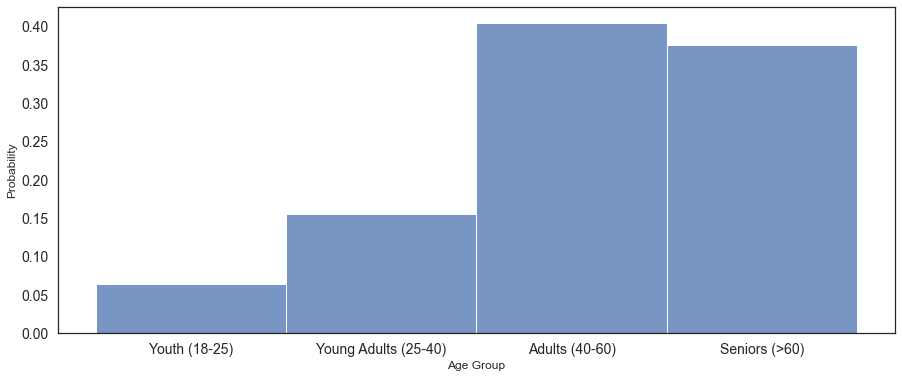

In [61]:
# Create a new column `age_group`
age_group = pd.cut(customerData['age'],
      bins = [customerData['age'].min(), 25, 40, 60, customerData['age'].max()],
      labels = ['Youth (18-25)', 'Young Adults (25-40)', 'Adults (40-60)', 'Seniors (>60)'])
customerData['age_group'] = age_group

plt.figure(figsize=(15,6))
ax = sns.histplot(data = customerData,x = 'age_group',stat = "probability")
ax.set(xlabel='Age Group')
plt.show()

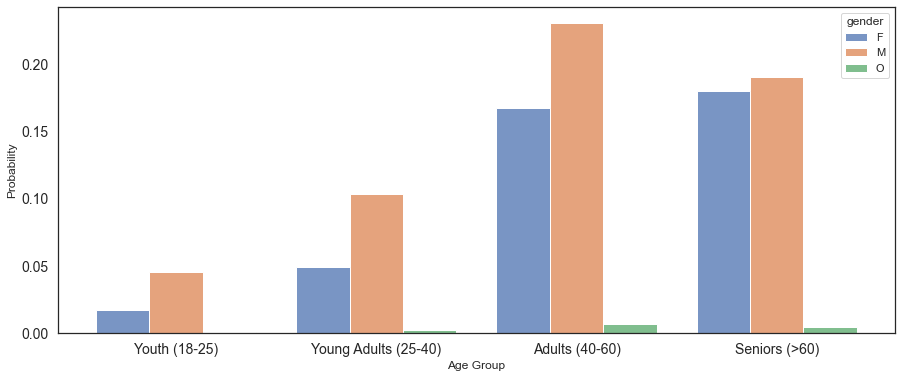

In [62]:
plt.figure(figsize=(15,6))
tempd = customerData.copy().sort_values(by=['gender'])
ax = sns.histplot(data=tempd, x="age_group", hue="gender", multiple="dodge", shrink=.8,stat = "probability")
ax.set(xlabel='Age Group')
plt.show()

<Figure size 1080x432 with 0 Axes>

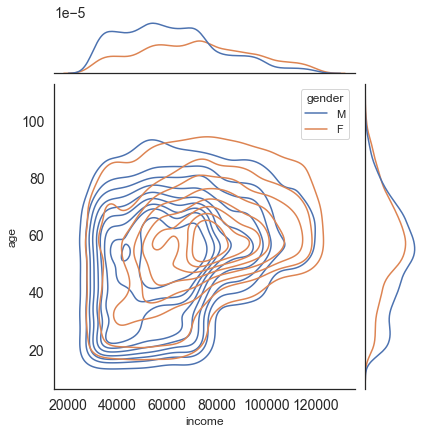

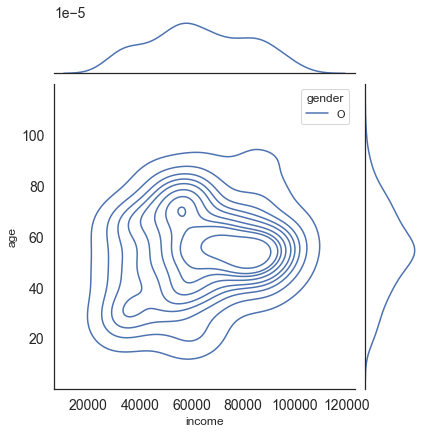

In [63]:
plt.figure(figsize=(15,6))
sns.jointplot(data=customerData[customerData['gender']!='O'], x="income", y="age", hue="gender", kind="kde")
sns.jointplot(data=customerData[customerData['gender']=='O'], x="income", y="age", hue="gender", kind="kde")

### Membership Trends

In [64]:
p = customerData.value_counts('became_member_on').sort_index()
memberAdded = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

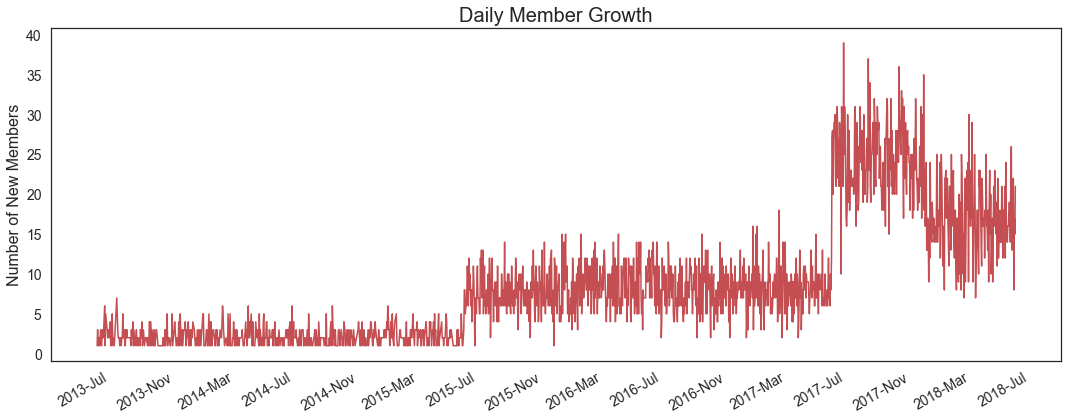

In [65]:
plt.figure(figsize = (15,6))
ax = sns.lineplot(x = memberAdded.index.values, y = memberAdded['Number of New Members'],color='r')
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of New Members', fontsize = 16)
plt.title('Daily Member Growth', fontsize = 20)
plt.tight_layout()
plt.show()

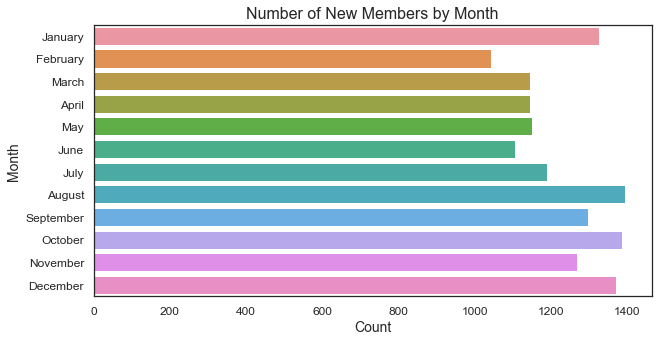

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(data = customerData.sort_values('month'), y = 'month_name')
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Month', fontsize = 14)
plt.show()

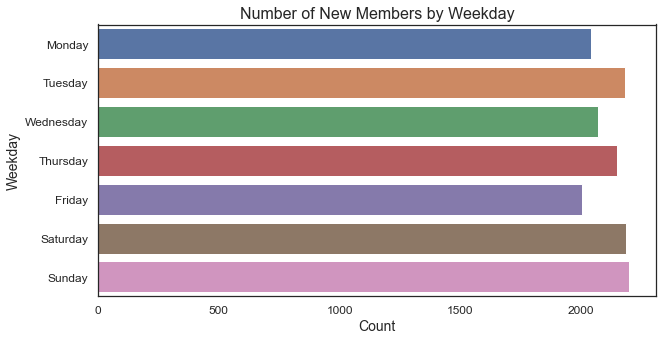

In [67]:
plt.figure(figsize = (10,5))
sns.countplot(data = customerData.sort_values('day_of_week'), y = 'day_name')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

In [68]:
#22200115538

#### MAQ

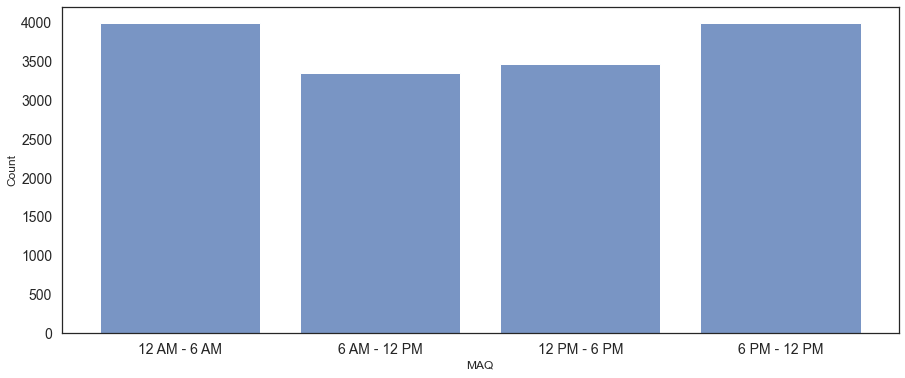

In [69]:
tempd = customerData.copy().sort_values(by=['MAQ'])
plt.figure(figsize = (15,6))
ax = sns.histplot(data=tempd, x="MAQ", shrink=.8)

ax.set_xticks(range(4), labels=['12 AM - 6 AM','6 AM - 12 PM','12 PM - 6 PM','6 PM - 12 PM'])
plt.show()

## Offer Transcripts Data

In [70]:
offerTData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 229997 to 28956
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   person          272762 non-null  object 
 1   event           272762 non-null  object 
 2   time            272762 non-null  int64  
 3   reward          272762 non-null  int64  
 4   offer id        272762 non-null  object 
 5   amount          272762 non-null  float64
 6   daysSinceStart  272762 non-null  int64  
 7   dayQuarter      272762 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 18.7+ MB


In [71]:
tempd = offerTData.copy()[['event','time']].groupby('event').sum().sort_values(by='time',ascending=False)
tempd.reset_index(inplace=True,drop=False)

tempd

,event,time
0,transaction,47262102
1,offer received,22118952
2,offer viewed,17677740
3,offer completed,12965130


<AxesSubplot:xlabel='event', ylabel='time'>

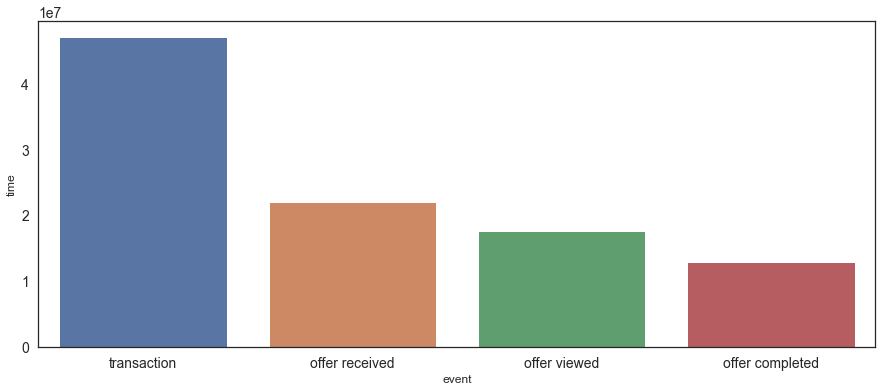

In [72]:
# event value count cat histplot graph
plt.figure(figsize = (15,6))
sns.barplot(data=tempd, x="event", y="time")

In [73]:
# offers varying with time line plot

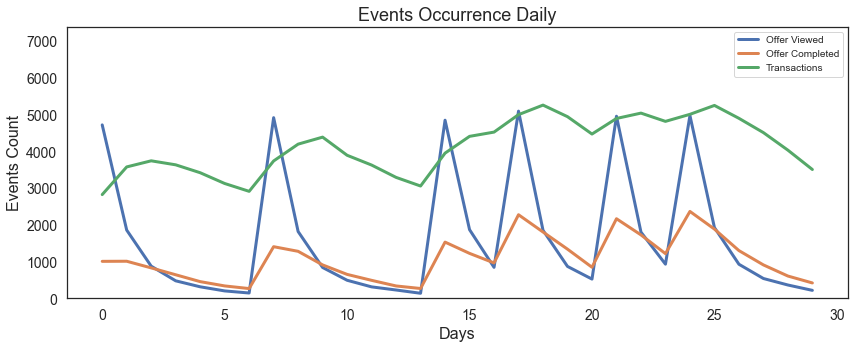

In [74]:
# Find how many events of each type occurred on each day from Day 0 to Day 29
received_daily = offerTData[offerTData['event'] == 'offer received'].value_counts('daysSinceStart').sort_index()
viewed_daily = offerTData[offerTData['event'] == 'offer viewed'].value_counts('daysSinceStart').sort_index()
completed_daily = offerTData[offerTData['event'] == 'offer completed'].value_counts('daysSinceStart').sort_index()
transaction_daily = offerTData[offerTData['event'] == 'transaction'].value_counts('daysSinceStart').sort_index()

# Visualize
fig, axs = plt.subplots(1,1, figsize = (14, 5))

days = np.arange(30)
# axs[1].stem(received_daily.index.values, received_daily, linefmt = ':k')
axs.plot(days, viewed_daily, lw = 3)
axs.plot(days, completed_daily, lw = 3)
axs.plot(days, transaction_daily, lw = 3)
axs.legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs.set_ylim([0, 7400])
axs.set_xlabel('Days', fontsize = 16)
axs.set_ylabel('Events Count', fontsize = 16)
axs.set_title('Events Occurrence Daily', fontsize = 18)

plt.show()


# View Rate , Completion Rate and Received Rate

In [75]:
offerData.reset_index(inplace=True,drop=False)
offerData = offerData.astype({'index': str})

In [76]:
offerData

,index,offer_type,difficulty,duration,reward,channels,id
0,0,bogo,5,5,5,"['web', 'email', 'mobile', 'social']",f19421c1d4aa40978ebb69ca19b0e20d
1,1,bogo,5,7,5,"['web', 'email', 'mobile']",9b98b8c7a33c4b65b9aebfe6a799e6d9
2,2,bogo,10,5,10,"['web', 'email', 'mobile', 'social']",4d5c57ea9a6940dd891ad53e9dbe8da0
3,3,bogo,10,7,10,"['email', 'mobile', 'social']",ae264e3637204a6fb9bb56bc8210ddfd
4,4,discount,7,7,3,"['web', 'email', 'mobile', 'social']",2298d6c36e964ae4a3e7e9706d1fb8c2
5,5,discount,10,7,2,"['web', 'email', 'mobile']",2906b810c7d4411798c6938adc9daaa5
6,6,discount,10,10,2,"['web', 'email', 'mobile', 'social']",fafdcd668e3743c1bb461111dcafc2a4
7,7,discount,20,10,5,"['web', 'email']",0b1e1539f2cc45b7b9fa7c272da2e1d7
8,8,informational,0,3,0,"['email', 'mobile', 'social']",5a8bc65990b245e5a138643cd4eb9837
9,9,informational,0,4,0,"['web', 'email', 'mobile']",3f207df678b143eea3cee63160fa8bed


In [77]:
# Create a df that only contains events about offers
df_event = offerTData[~(offerTData['event'] == 'transaction')]

event_offer = pd.merge(df_event, offerData, left_on = 'offer id', right_on = 'id').drop('id', axis = 1)

event_offer.sample(3)

,person,event,time,reward_x,offer id,amount,daysSinceStart,dayQuarter,index,offer_type,difficulty,duration,reward_y,channels
51537,705644ad87c44c09bfc8162c85ec7368,offer received,408,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,17,0.0,6,discount,10,10,2,"['web', 'email', 'mobile', 'social']"
100482,e039a7776e2d4ebfbb5b240e3811c0a3,offer completed,624,5,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,26,0.0,7,discount,20,10,5,"['web', 'email']"
117344,10293859aee544a8910d06dc0c62c7e7,offer viewed,342,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,14,1.0,3,bogo,10,7,10,"['email', 'mobile', 'social']"


In [78]:
event_offer.value_counts('event')

event
offer received     66501
offer viewed       49860
offer completed    32444
dtype: int64

In [79]:
offerEventCounts = event_offer.value_counts('event').values

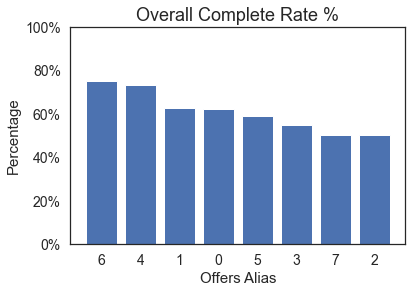

In [80]:
# Find out the number of time being received for each offer 
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('index').sort_values(ascending = False)

# Find out the number of time being completed for each offer 
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('index').sort_values(ascending = False)

# Overall completion rate of each offer
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)
overall_complete_rate.sort_values(ascending = False)
# Visualize
ax = plt.bar(x = overall_complete_rate.index, height = overall_complete_rate.values)

plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offers Alias', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()

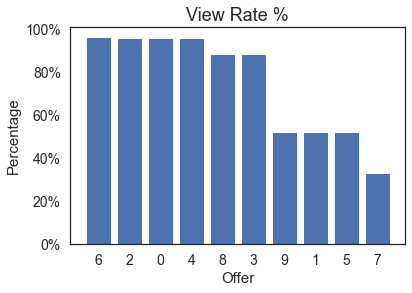

In [208]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p1 = offer_viewed.value_counts('index').sort_values(ascending = False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(p1)), height = p1_rate.values, tick_label = p1_rate.index.values)
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

In [209]:
offers_added = offerData.assign(view_rate = p1_rate.sort_index().values,
                            complete_rate = overall_complete_rate.sort_index().values)

# Set `offer_alias` as index
offers_added.set_index('index', inplace = True)

# From the new df, extract `view_rate`, 'complete_rate' and other numeric columns
offers_numeric = offers_added.select_dtypes(include = 'number')

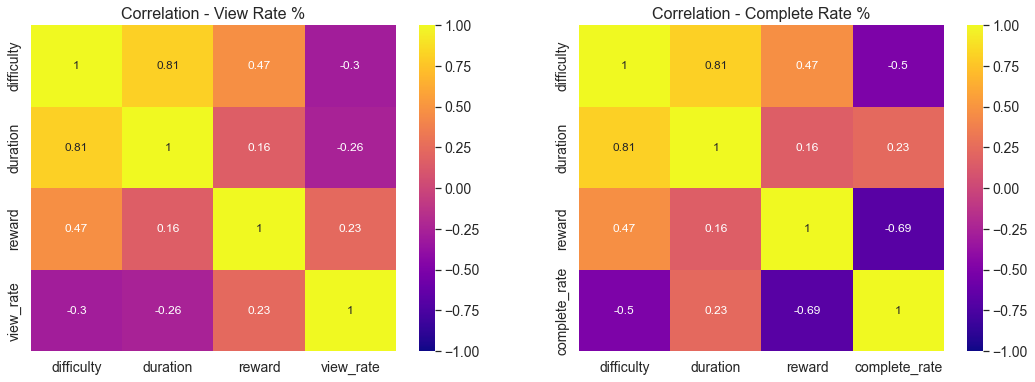

In [210]:
fig, axs = plt.subplots(1,2, figsize = (18, 6))
sns.heatmap(offers_numeric.iloc[:, :-1].corr(), cmap = 'plasma', 
            annot = True, vmin = -1, vmax = 1, ax = axs[0])
axs[0].set_title('Correlation - View Rate %', fontsize = 16)

sns.heatmap(offers_numeric.iloc[:, [0,1,2,4]].corr(), cmap = 'plasma', 
            annot = True, vmin = -1, vmax = 1, ax = axs[1])
axs[1].set_title('Correlation - Complete Rate %', fontsize = 16)
plt.show()

# Customer Segmentation

In [137]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           14825 non-null  int64         
 1   index             14825 non-null  int64         
 2   id                14825 non-null  object        
 3   gender            14825 non-null  object        
 4   age               14825 non-null  int64         
 5   income            14825 non-null  float64       
 6   became_member_on  14825 non-null  datetime64[ns]
 7   moneySpent        14825 non-null  object        
 8   interest          14825 non-null  int32         
 9   MAQ               14825 non-null  object        
 10  transactions      14825 non-null  int64         
 11  offV              14825 non-null  int64         
 12  offC              14825 non-null  int64         
 13  year              14825 non-null  int64         
 14  month             1482

In [138]:
custData = customerData[['moneySpent','offV','offC','transactions','interest']]

In [139]:
custData.head()

,moneySpent,offV,offC,transactions,interest
0,127.6,4,3,8,1
1,79.46,5,3,5,1
2,196.86,3,3,8,2
3,154.05,4,3,12,1
4,48.34,4,3,18,1


In [140]:
custData.value_counts('moneySpent')

moneySpent
0.00       333
15.84        6
10.14        6
9.52         6
25.53        5
          ... 
75.67        1
75.68        1
75.72        1
75.75        1
1608.69      1
Length: 11585, dtype: int64

In [141]:
#sns.boxplot(x = custData['moneySpent'])

In [142]:
q = customerData['moneySpent'].quantile(0.98)
rows_top_money_spent = customerData[customerData['moneySpent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customerData = customerData[customerData['moneySpent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


In [143]:
#custData.interest = custData.interest.astype('str')

In [144]:
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customerData[['moneySpent','offV','offC','transactions','interest']])
customer_behavior_scaled = scaler_customer_behavior.transform(customerData[['moneySpent','offV','offC','transactions','interest']])
pd.DataFrame(data = customer_behavior_scaled, columns = custData.columns.values).head(3)

,moneySpent,offV,offC,transactions,interest
0,0.277234,0.501233,0.531352,-0.060069,-0.538941
1,-0.281415,1.276977,0.531352,-0.639666,-0.538941
2,1.080974,-0.274511,0.531352,-0.060069,0.393281


In [147]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customerData.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

cluster
0    1260
1    3630
2    3098
3    2855
4    3685
dtype: int64

 ************************************************************
Silhouette Score: 0.3348149962308341

 ************************************************************
        level_0   index   age   income              became_member_on  \
           mean    mean  mean     mean                          mean   
cluster                                                                
0        7503.9  7503.9  47.0  48635.7 2016-01-11 23:48:34.285714176   
1        7420.6  7420.6  56.6  72326.4 2016-11-21 06:57:43.140495872   
2        7411.4  7411.4  57.4  73179.5 2017-01-01 09:04:45.861846272   
3        7458.9  7458.9  55.4  64984.6 2017-08-27 17:39:41.926444800   
4        7336.2  7336.2  51.2  57354.4 2017-06-21 08:22:08.629579520   

        moneySpent interest  MAQ transactions offV offC    year month   day  \
              mean     mean mean         mean mean mean    mean  mean  mean   
cluster                        

C:\Users\Daksh Rathore\AppData\Local\Temp\ipykernel_26968\430606600.py:13: FutureWarning: ['id', 'gender', 'month_name', 'day_name', 'age_group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])


In [198]:
color_list = ['green', 'blue', 'red', 'grey', 'purple']

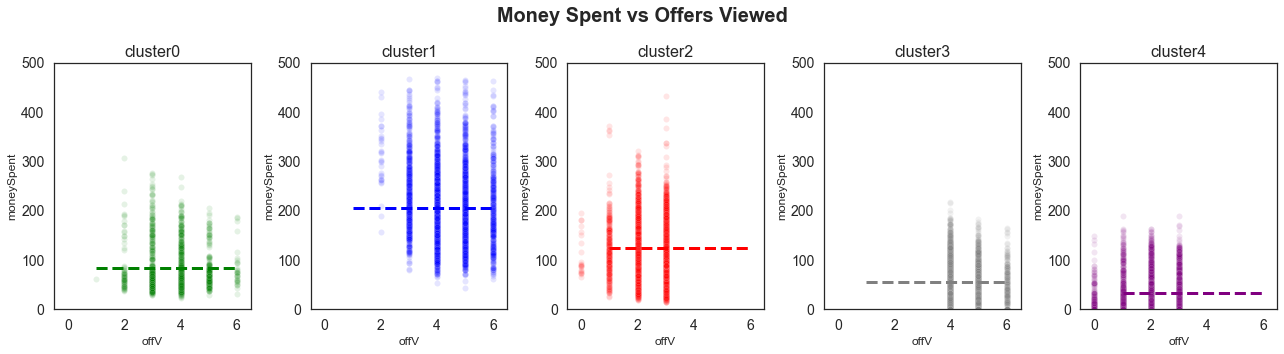

In [199]:
fig, axs = plt.subplots(1, 5, figsize = (18,5))
for i in range(5):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'offV', y = 'moneySpent', alpha = 0.1, color = color_list[i], ax = axs[i])
    mean_value = customerData[customer_with_cluster['cluster'] == i].agg({'moneySpent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((-0.5,6.5))
    axs[i].set_ylim((-0.5,500))

fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

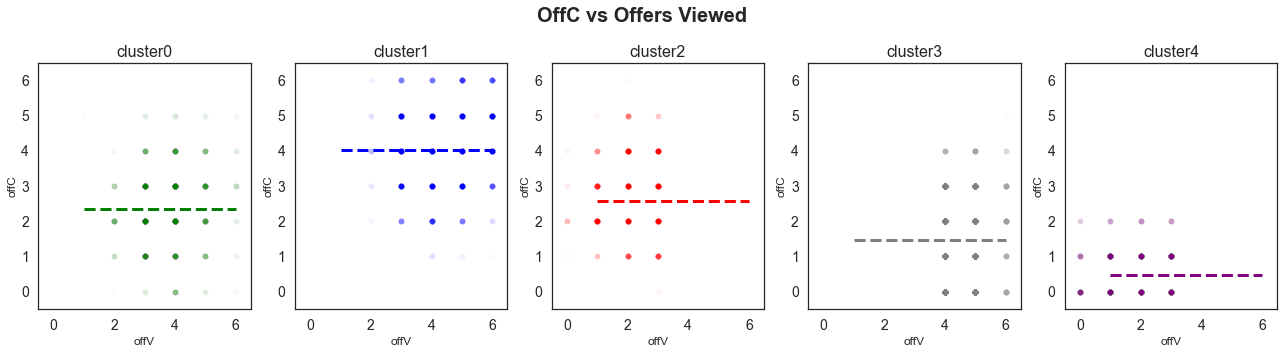

In [200]:
fig, axs = plt.subplots(1, 5, figsize = (18,5))
for i in range(5):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'offV', y = 'offC', alpha = 0.02, color = color_list[i], ax = axs[i])
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'offC': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((-0.5,6.5))
    axs[i].set_ylim((-0.5,6.5))

fig.suptitle('OffC vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

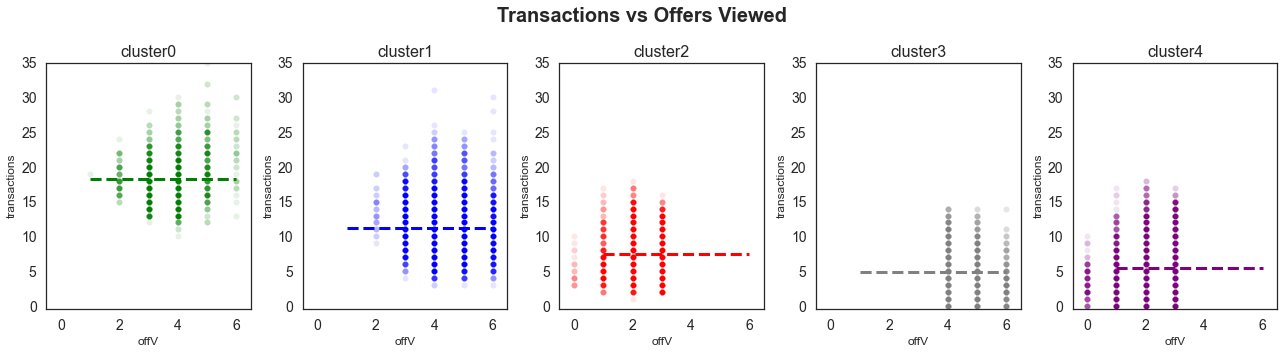

In [201]:
fig, axs = plt.subplots(1, 5, figsize = (18,5))
for i in range(5):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'offV', y = 'transactions', alpha = 0.1, color = color_list[i], ax = axs[i])
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((-0.5,6.5))
    axs[i].set_ylim((-0.5,35))

fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

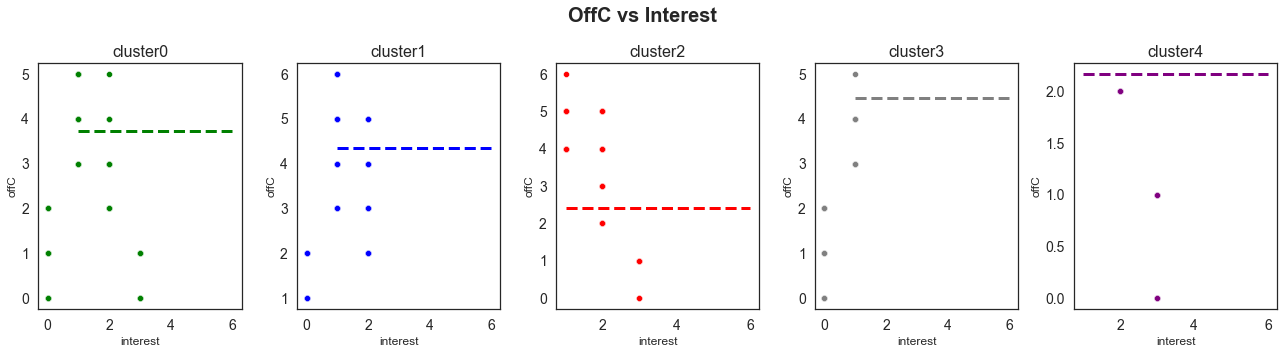

In [202]:
fig, axs = plt.subplots(1, 5, figsize = (18,5))
for i in range(5):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'interest', y = 'offC', alpha = 1, color = color_list[i], ax = axs[i])
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'offV': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('cluster' + str(i), fontsize = 16)

fig.suptitle('OffC vs Interest', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

# Cluster Analysis
+ Cluster 0 : Loyal Customers
+ Cluster 1 : Most Valuable Customers
+ Cluster 2 : High Potential
+ Cluster 3 : Offer Viewers
+ Cluster 4 : Low Engagers

In [153]:
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [154]:
# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9872677219545767


In [155]:
# Scale features
rows_top_money_spent_scaled = scaler_customer_behavior.transform(rows_top_money_spent[['moneySpent','offV','offC','transactions','interest']])

# Have a direct look at the clustering result
knn.predict(rows_top_money_spent_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [159]:
rows_top_money_spent

,level_0,index,id,gender,age,income,became_member_on,moneySpent,interest,MAQ,transactions,offV,offC,year,month,day,month_name,day_name,day_of_week,age_group
43,43,43,00e9f403afa641889cd034ee7c7ca6e9,M,73,45000.0,2016-04-17,614.59,1,0,17,4,3,2016,4,17,April,Sunday,6,Seniors (>60)
76,76,76,017febbe52e64ac19cf28cf0d44386e4,M,61,100000.0,2015-08-29,1003.41,1,2,10,5,3,2015,8,29,August,Saturday,5,Seniors (>60)
87,87,87,019ed95d987446e3947da0246cdab831,M,59,76000.0,2017-07-15,515.09,2,0,8,1,2,2017,7,15,July,Saturday,5,Adults (40-60)
90,90,90,01ab25c31f034f85bc4ac9d286fb7a76,F,87,77000.0,2018-07-17,644.29,1,1,5,4,4,2018,7,17,July,Tuesday,1,Seniors (>60)
95,95,95,01de69b5edab4b89859ea8a7214ba35a,F,53,84000.0,2017-04-23,765.88,2,0,7,3,2,2017,4,23,April,Sunday,6,Adults (40-60)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14672,14672,14672,fd64a230ea2f4062be6cec5d0b69540e,M,59,46000.0,2016-03-28,524.31,3,1,10,2,1,2016,3,28,March,Monday,0,Adults (40-60)
14742,14742,14742,fe97aa22dd3e48c8b143116a8403dd52,F,39,67000.0,2017-12-17,562.77,0,1,11,5,1,2017,12,17,December,Sunday,6,Young Adults (25-40)
14761,14761,14761,fef79a64b82e4a8ebd8f583101c4a85c,F,65,83000.0,2018-03-25,627.91,1,3,8,4,3,2018,3,25,March,Sunday,6,Seniors (>60)
14770,14770,14770,ff2113310abe4c6687569bdd8f028fe3,M,55,100000.0,2017-05-08,973.74,2,2,6,2,4,2017,5,8,May,Monday,0,Adults (40-60)


In [160]:
customer_behavior_clustered = rows_top_money_spent
customer_behavior_clustered = customer_behavior_clustered.assign(cluster = knn.predict(rows_top_money_spent_scaled))


# Assign these customers to cluster 1
#customer_behavior_clustered.fillna(value = 1, inplace = True)

# Convert cluster label from float to integers
customer_behavior_clustered['cluster'] = customer_behavior_clustered['cluster'].astype('int')

In [161]:
# merge 
# Reset index for `customer_behavior_clustered`

# Merge
customer_behavior_profile = pd.concat([customer_with_cluster, customer_behavior_clustered], axis = 0)
# Add column `cluster_alias`
customer_behavior_profile['cluster_alias'] = customer_behavior_profile['cluster'].map({4: 'Low Engagers',
                                                                                       0: 'Loyal Customers',
                                                                                       2: 'High Potential',
                                                                                       1: 'Most Valuable Customer',
                                                                                       3: 'Offer Viewers'})
customer_behavior_profile.reset_index(inplace = True,drop = True)
customer_behavior_profile

,level_0,index,id,gender,age,income,became_member_on,moneySpent,interest,MAQ,...,offC,year,month,day,month_name,day_name,day_of_week,age_group,cluster,cluster_alias
0,0,0,0009655768c64bdeb2e877511632db8f,M,33,72000.0,2017-04-21,127.6,1,2,...,3,2017,4,21,April,Friday,4,Young Adults (25-40),1,Most Valuable Customer
1,1,1,0011e0d4e6b944f998e987f904e8c1e5,O,40,57000.0,2018-01-09,79.46,1,3,...,3,2018,1,9,January,Tuesday,1,Young Adults (25-40),3,Offer Viewers
2,2,2,0020c2b971eb4e9188eac86d93036a77,F,59,90000.0,2016-03-04,196.86,2,2,...,3,2016,3,4,March,Friday,4,Adults (40-60),2,High Potential
3,3,3,0020ccbbb6d84e358d3414a3ff76cffd,F,24,60000.0,2016-11-11,154.05,1,0,...,3,2016,11,11,November,Friday,4,Youth (18-25),1,Most Valuable Customer
4,4,4,003d66b6608740288d6cc97a6903f4f0,F,26,73000.0,2017-06-21,48.34,1,2,...,3,2017,6,21,June,Wednesday,2,Young Adults (25-40),0,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14820,14672,14672,fd64a230ea2f4062be6cec5d0b69540e,M,59,46000.0,2016-03-28,524.31,3,1,...,1,2016,3,28,March,Monday,0,Adults (40-60),1,Most Valuable Customer
14821,14742,14742,fe97aa22dd3e48c8b143116a8403dd52,F,39,67000.0,2017-12-17,562.77,0,1,...,1,2017,12,17,December,Sunday,6,Young Adults (25-40),1,Most Valuable Customer
14822,14761,14761,fef79a64b82e4a8ebd8f583101c4a85c,F,65,83000.0,2018-03-25,627.91,1,3,...,3,2018,3,25,March,Sunday,6,Seniors (>60),1,Most Valuable Customer
14823,14770,14770,ff2113310abe4c6687569bdd8f028fe3,M,55,100000.0,2017-05-08,973.74,2,2,...,4,2017,5,8,May,Monday,0,Adults (40-60),1,Most Valuable Customer


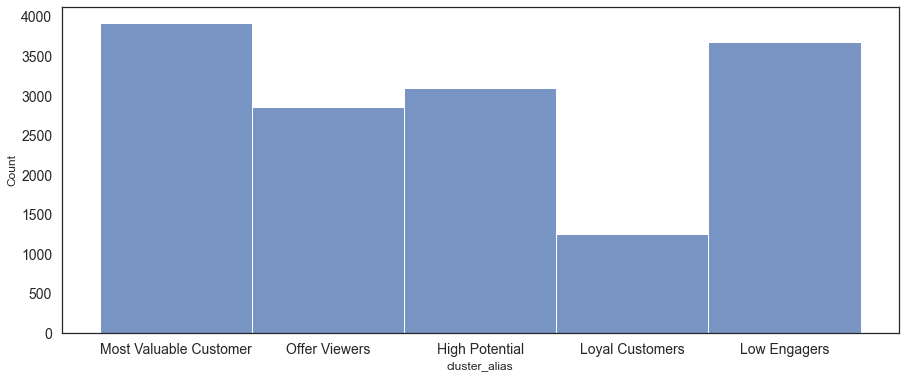

In [213]:
plt.figure(figsize=(15,6))
sns.histplot(customer_behavior_profile['cluster_alias'],stat = "count")
plt.show()

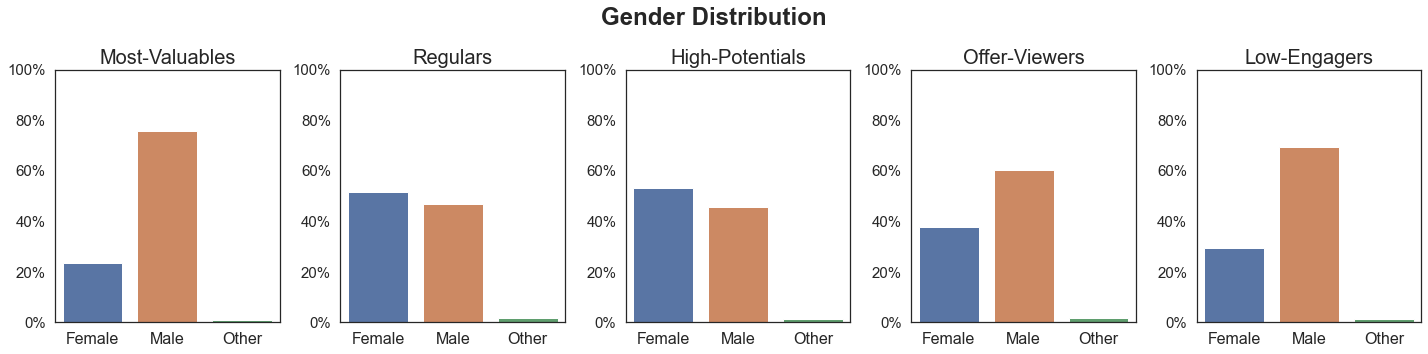

In [162]:
num_clusters = customer_behavior_profile['cluster'].nunique()
fig, axs = plt.subplots(1, num_clusters, figsize = (20,5))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
xticklabels = ['Female', 'Male', 'Other']
yticks = np.arange(0,1.2, 0.2)
yticklabels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == i].value_counts('gender').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_xticklabels(xticklabels, fontsize = 16)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(yticklabels, fontsize = 15)

plt.suptitle('Gender Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

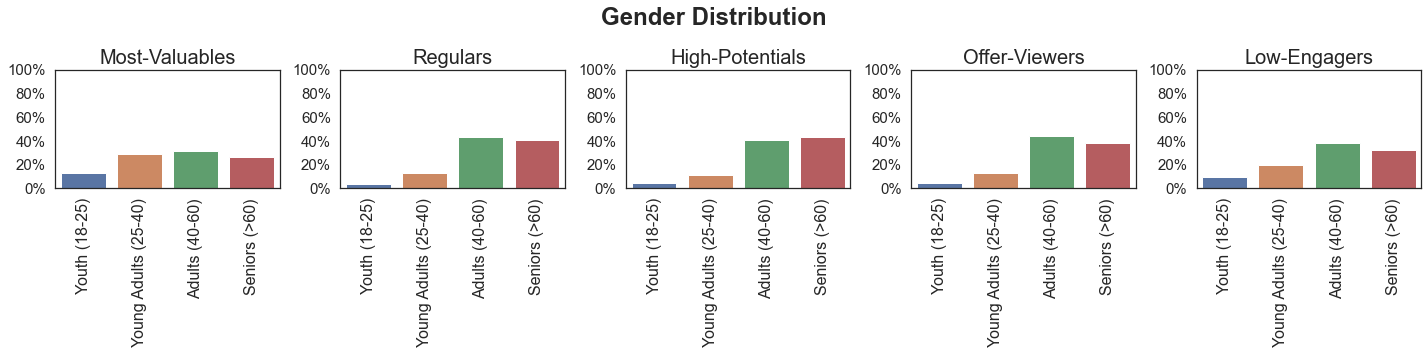

In [188]:
#Age distro
num_clusters = customer_behavior_profile['cluster'].nunique()
fig, axs = plt.subplots(1, num_clusters, figsize = (20,5))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
xticklabels = ['Youth (18-25)', 'Young Adults (25-40)', 'Adults (40-60)', 'Seniors (>60)']
yticks = np.arange(0,1.2, 0.2)
yticklabels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == i].value_counts('age_group').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_xticklabels(xticklabels, fontsize = 16,rotation = 90)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(yticklabels, fontsize = 15)

plt.suptitle('Gender Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

C:\Users\Daksh Rathore\AppData\Local\Temp\ipykernel_26968\910523901.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(xticklabels, fontsize = 16, rotation = 90)
C:\Users\Daksh Rathore\AppData\Local\Temp\ipykernel_26968\910523901.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(xticklabels, fontsize = 16, rotation = 90)
C:\Users\Daksh Rathore\AppData\Local\Temp\ipykernel_26968\910523901.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(xticklabels, fontsize = 16, rotation = 90)
C:\Users\Daksh Rathore\AppData\Local\Temp\ipykernel_26968\910523901.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(xticklabels, fontsize = 16, rotation = 90)
C:\Users\Daksh Rathore\AppData\Local\Temp\ipykernel_26968\910523901.py:12: UserWarning: FixedFormatter should only be used toget

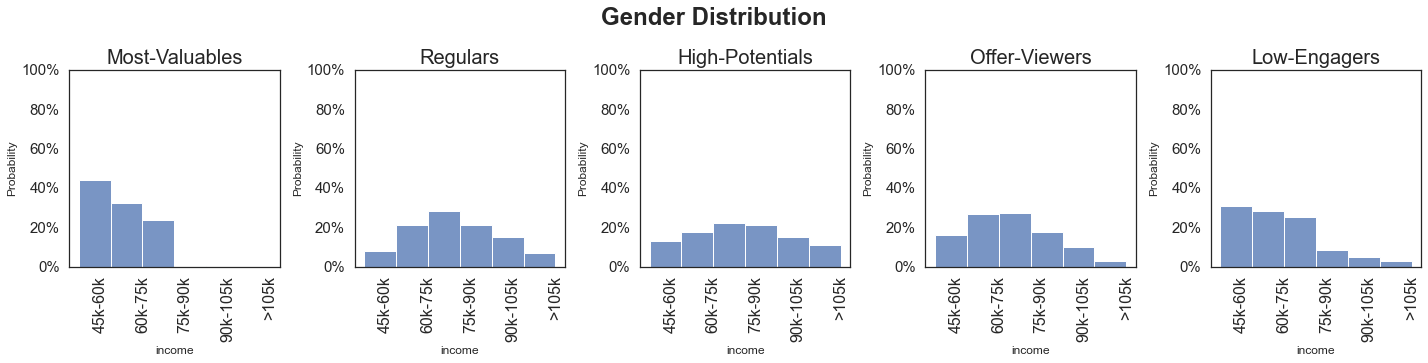

In [191]:
#Income distro
num_clusters = customer_behavior_profile['cluster'].nunique()
fig, axs = plt.subplots(1, num_clusters, figsize = (20,5))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
xticklabels = ['0-45k', '45k-60k', '60k-75k','75k-90k','90k-105k','>105k']
yticks = np.arange(0,1.2, 0.2)
yticklabels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == i].value_counts('age_group').sort_index()
    sns.histplot(customer_behavior_profile[customer_behavior_profile['cluster'] == i]['income'], bins=[customerData['income'].min(), 45000, 60000, 75000, 90000, 105000, customerData['income'].max()] ,kde=False,stat = "probability", ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_xticklabels(xticklabels, fontsize = 16, rotation = 90)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(yticklabels, fontsize = 15)

plt.suptitle('Gender Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

<Figure size 1080x432 with 0 Axes>

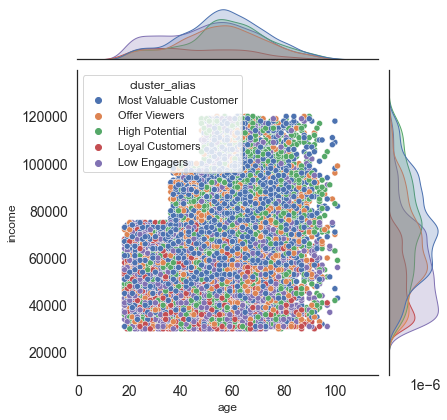

In [197]:
plt.figure(figsize=(15,6))
sns.jointplot(data=customer_behavior_profile, x="age", y="income", hue="cluster_alias")